# Act 1. Estadistica. Preprocesamiento de una serie temporal

## Kevin Joan Delgado Pérez A01706328


### Para  comenzar el procesamiento, procedemos a cargar las rutas de google drive y sus respectivas configuraciones de librerías y atributos.

In [1]:
from google.colab import drive

drive.mount("/content/drive")  
!pwd  # show current path 

Mounted at /content/drive
/content


In [2]:
%cd "/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases"
!ls  # show current directory

/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases
Airlines.csv		       spark-3.2.2-bin-hadoop3.2.tgz.1	us2022q2e.csv
SeoulBikeData.csv	       us2022q2a.csv			usfirms2022.csv
spark-3.2.2-bin-hadoop3.2      us2022q2c.csv
spark-3.2.2-bin-hadoop3.2.tgz  us2022q2d.csv


In [229]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [230]:
sns.set(rc={"figure.figsize": (14,8)})

In [311]:
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")

In [312]:
df_data

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


### Cargamos el penúltimo cuarto del dataset

In [313]:
df = df_data.query("q >= '2022q1' and q <='2022q1'")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
88,A,2022q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,0.000,2.730000e+06,5154000.00,131.888962,132.3300,300113.377,3.0,2022.0,1.0
178,AA,2022q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,1000.000,1.727000e+06,6257000.00,89.694160,90.0300,185403.032,3.0,2022.0,1.0
268,AAIC,2022q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,7.027860e+05,NaN,1.639200e+05,218097.00,3.470000,3.4700,35016.392,3.0,2022.0,1.0
358,AAL,2022q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,7.634100e+07,2382000.000,3.546100e+07,-8940000.00,18.250000,18.2500,649160.117,3.0,2022.0,1.0
448,AAME,2022q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,2.486080e+05,NaN,3.373800e+04,126423.00,3.112825,3.1300,20378.576,3.0,2022.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324084,ZVIA,2022q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,608.000,4.840000e+02,93861.00,4.570000,4.5700,66686.135,3.0,2022.0,1.0
324174,ZVO,2022q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,1.374840e+05,0.000,0.000000e+00,11267.00,0.820100,0.8201,34054.879,3.0,2022.0,1.0
324264,ZWS,2022q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,9.249000e+05,5600.000,5.403000e+05,193700.00,35.281528,35.4000,125782.456,3.0,2022.0,1.0
324354,ZY,2022q1,4791.0,12455.0,5.608200e+04,-130.0,-532.00000,7994.000,-26.0,6.181890e+05,2.741250e+05,57845.000,1.811680e+05,344064.00,2.890000,2.8900,103120.808,3.0,2022.0,1.0


In [314]:
df_firms.rename(columns = {'Ticker':'firm','Sector NAICS\nlevel 1':'Industry'},inplace=True)

### Unimos ambos datasets

In [315]:
df = df.merge(df_firms, on='firm')

In [316]:
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Industry,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2022q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,AA,2022q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,...,Alcoa Corp,127,Com,US,Stock,Manufacturing,NYSE,Basic & Fab Metal,Alumina and Aluminum Production and Processing,-
2,AAIC,2022q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,...,Arlington Asset Investment Corp,303,Com A,US,Stock,Finance and Insurance,NYSE,Funds,Other Investment Pools and Funds,-
3,AAL,2022q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,...,American Airlines Group Inc,186,Com,US,Stock,Transportation and Warehousing,NASDAQ,Transportat Serv,Scheduled Air Transportation,0.032
4,AAME,2022q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,...,Atlantic American Corp,353,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Insurance Carriers,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ZVIA,2022q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,...,Zevia Pbc,3591,Com A,US,Stock,Manufacturing,NYSE,Food & Beverage,Beverage Manufacturing,-
3596,ZVO,2022q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,...,Zovio Inc,3601,Com,US,Stock,Educational Services,NASDAQ,Other,Educational Services,-
3597,ZWS,2022q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,...,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3598,ZY,2022q1,4791.0,12455.0,5.608200e+04,-130.0,-532.00000,7994.000,-26.0,6.181890e+05,...,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-


### Asignamos un multi index, nombre de la firma y el cuarto seleccionado.

In [317]:
df['q'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm','q'],inplace=True)
df.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind"], inplace=True)
df

,,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Industry,Sector\nEconomatica
firm,q,,,,,,,,,,,,,,,,,,,,
A,2022Q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,0.000,2.730000e+06,5154000.00,131.888962,132.3300,300113.377,3.0,2022.0,1.0,Manufacturing,Electric Electron
AA,2022Q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,1000.000,1.727000e+06,6257000.00,89.694160,90.0300,185403.032,3.0,2022.0,1.0,Manufacturing,Basic & Fab Metal
AAIC,2022Q1,8470.0,4773.0,0.000000e+00,0.0,-4111.00000,0.000,2287.0,9.208830e+05,7.027860e+05,NaN,1.639200e+05,218097.00,3.470000,3.4700,35016.392,3.0,2022.0,1.0,Finance and Insurance,Funds
AAL,2022Q1,8899000.0,0.0,1.062200e+07,0.0,92000.00000,455000.000,-451000.0,6.740100e+07,7.634100e+07,2382000.000,3.546100e+07,-8940000.00,18.250000,18.2500,649160.117,3.0,2022.0,1.0,Transportation and Warehousing,Transportat Serv
AAME,2022Q1,51608.0,0.0,4.781200e+04,0.0,0.00000,0.000,954.0,3.750310e+05,2.486080e+05,NaN,3.373800e+04,126423.00,3.112825,3.1300,20378.576,3.0,2022.0,1.0,Finance and Insurance,Finance and Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022Q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,608.000,4.840000e+02,93861.00,4.570000,4.5700,66686.135,3.0,2022.0,1.0,Manufacturing,Food & Beverage
ZVO,2022Q1,61633.0,39829.0,2.903600e+04,0.0,-127.00000,0.000,78.0,1.487510e+05,1.374840e+05,0.000,0.000000e+00,11267.00,0.820100,0.8201,34054.879,3.0,2022.0,1.0,Educational Services,Other
ZWS,2022Q1,239600.0,137700.0,5.690000e+04,1100.0,1100.00000,4800.000,10000.0,1.118600e+06,9.249000e+05,5600.000,5.403000e+05,193700.00,35.281528,35.4000,125782.456,3.0,2022.0,1.0,Manufacturing,Industrial Machin


### Se obtienen las 3 medidas de rentabilidad, 1. ROA, 2. Profit margin, 3. Booktomarket

### ROA

In [318]:
df = df.assign(bookvalue = (df['totalassets']-df['totalliabilities']))
#df.sort_values(by=['bookvalue'], ascending = False )

In [319]:
df = df.assign(marketvalue = (df['originalprice']*df['sharesoutstanding']))
#df.sort_values(by=['marketvalue'], ascending = False )

In [320]:
df = df.assign(ebit = (df['revenue']-df['cogs']-df['sgae']-df['otheropexp']))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.assign(netincome = (df['ebit']-df['incometax']-df['finexp']))
df = df.assign(ROA = (df['netincome']/df['totalassets']))
#df[['ROA','netincome','totalassets']].sort_values(by='ROA', ascending = False).head(10)

### Profit margin

In [321]:
df = df.assign(profitmargin = (df['ebit']/df['revenue']))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.sort_values(by=['profitmargin'], ascending = False )

### Book-to-market

In [322]:
df = df.assign(bookvalue = (df[['bookvalue']]))
df = df.assign(marketvalue = (df[['marketvalue']]))
df = df.assign(booktomarket = (df['bookvalue']/df['marketvalue']))
#df.sort_values(by=['booktomarket'], ascending = False )

### Para obtener los tamaños a definir de las firmas:

In [323]:
df = df.sort_values(by=['q','marketvalue'], ascending = True)
df['size'] = df.groupby(['q'])['marketvalue'].transform(lambda x: pd.qcut(x,3,labels = ["small", "medium", "big"]))
df[['size']].value_counts(sort = True)

size  
small     1184
medium    1183
big       1183
dtype: int64

In [324]:
df_size = pd.get_dummies(df['size'])

In [325]:
df = df.merge(df_size, on='firm')
df

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,marketvalue,ebit,netincome,ROA,profitmargin,booktomarket,size,small,medium,big
firm,,,,,,,,,,,,,,,,,,,,,
CTIB,5797.000,4758.00,1058.000,0.000,94.000000,96.000,0.00,18261.000,14200.000,5887.000,...,7241.89375,-19.000,-115.000,-0.006298,-0.003278,0.560765,small,1,0,0
KPRX,0.000,0.00,2372.719,1196.723,4.210854,-0.217,0.00,17636.276,6378.482,92.317,...,7875.26081,-3569.442,-3569.225,-0.202380,NaN,1.429514,small,1,0,0
THMO,2663.000,1723.00,2149.000,0.000,122.000000,823.000,0.00,18279.000,16997.000,11000.000,...,8724.31636,-1209.000,-2032.000,-0.111166,-0.453999,0.146946,small,1,0,0
EFOI,2061.000,2087.00,2630.000,0.000,19.000000,184.000,0.00,12549.000,9117.000,4507.000,...,8777.13672,-2656.000,-2840.000,-0.226313,-1.288695,0.391016,small,1,0,0
SNES,195.000,105.00,2423.000,0.000,0.000000,-1.000,0.00,9304.000,1377.000,16.000,...,8914.96659,-2333.000,-2332.000,-0.250645,-11.964103,0.889179,small,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
UTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
VVNT,392748.000,95460.00,287946.000,0.000,1037.000000,37378.000,432.00,2713153.000,4467039.000,28136.000,...,NaN,9342.000,-28468.000,-0.010493,0.023786,NaN,NaN,0,0,0


### Últimos ajustes para generar las variables de la matriz

In [326]:
df['Adj'] = np.log(df['adjprice']) - np.log(df['adjprice'].shift(4))

In [327]:
df.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,marketvalue,ebit,netincome,ROA,profitmargin,booktomarket,small,medium,big,Adj
count,3.505000e+03,3.504000e+03,3.504000e+03,3.504000e+03,3.505000e+03,3.505000e+03,3.505000e+03,3.510000e+03,3.510000e+03,2.934000e+03,...,3.550000e+03,3.504000e+03,3.504000e+03,3504.000000,3234.000000,3499.000000,3600.000000,3600.000000,3600.000000,3577.000000
mean,1.343948e+06,7.736588e+05,3.637429e+05,1.794653e+04,-1.605533e+04,1.645795e+04,3.160967e+04,1.558759e+07,1.234050e+07,3.347133e+05,...,1.329745e+07,1.878907e+05,1.399096e+05,-0.022645,-9.842945,0.541085,0.328889,0.328611,0.328611,0.003590
std,5.979345e+06,4.373365e+06,1.601791e+06,2.277292e+05,3.272018e+05,6.957570e+04,1.833781e+05,1.147118e+08,1.043877e+08,2.117994e+06,...,8.443410e+07,1.019701e+06,8.516896e+05,0.102863,156.626350,0.594958,0.469875,0.469774,0.469774,1.248787
min,-9.130980e+05,-1.100000e+04,-2.374000e+06,-3.322000e+06,-8.571000e+06,-1.053553e+06,-1.793000e+06,1.956000e+03,5.000000e+00,-1.500600e+04,...,7.241894e+03,-6.669379e+06,-6.675247e+06,-1.462679,-6855.142857,-4.800709,0.000000,0.000000,0.000000,-5.365548
25%,1.860937e+04,0.000000e+00,1.021025e+04,0.000000e+00,-2.183000e+03,0.000000e+00,0.000000e+00,2.851752e+05,9.790400e+04,5.095510e+02,...,2.498051e+05,-7.376467e+03,-9.423441e+03,-0.031939,-0.093157,0.200823,0.000000,0.000000,0.000000,-0.837765
50%,1.408040e+05,2.077600e+04,5.210100e+04,0.000000e+00,0.000000e+00,5.000000e+02,8.380000e+02,1.486858e+06,8.650485e+05,7.512000e+03,...,1.381846e+06,9.835580e+03,5.071500e+03,0.004278,0.072301,0.431694,0.000000,0.000000,0.000000,0.017227
75%,6.533480e+05,2.574395e+05,1.852395e+05,2.256425e+01,3.640000e+02,9.114000e+03,1.271900e+04,6.219684e+06,4.247427e+06,6.599300e+04,...,5.475185e+06,8.673275e+04,6.001375e+04,0.013947,0.227732,0.763873,1.000000,1.000000,1.000000,0.876261
max,1.528710e+08,1.155220e+08,4.602700e+07,7.727000e+06,5.320000e+06,1.722000e+06,5.129000e+06,3.954687e+09,3.668788e+09,5.938790e+07,...,2.849538e+09,2.997900e+07,2.485000e+07,2.071964,29.146628,7.900232,1.000000,1.000000,1.000000,4.355672


In [328]:
df = df.dropna()

In [359]:
matrix = df[['medium','big','ROA','profitmargin','booktomarket']]
y = df['Adj']

### Procederemos a generar la matriz de covarianza-varianza


### Si se siguen los pasos de la formula proporcionada tenemos que:

In [360]:
matrix_cov = matrix.to_numpy()
matrix_covTransp = np.transpose(matrix_cov)
#print(matrix_cov)
#print(matrix_covTransp)

In [361]:
pp = np.dot(matrix_covTransp, matrix_cov)
matrix1= np.zeros((matrix_covTransp.shape[1],1))
#print(matrix1)
#print(pp)

In [362]:
matrix1 = 1 + matrix1
#print(matrix1)

In [363]:
pp2 = np.dot(matrix_covTransp, matrix1)
Transp1 = np.transpose(pp2)
#print(Transp1)
#print(pp2)

In [364]:
pp3 = np.dot(pp2, Transp1)
div = pp3 / matrix_cov.shape[0]
#print(pp3)
#print(div)

In [365]:
nume = pp - div
matrix_cov = nume/(matrix_cov.shape[0]-1)
#print(nume)

In [366]:
matrixcov_df = pd.DataFrame(matrix_cov)
matrixcov_df

,0,1,2,3,4
0,0.223796,-0.126061,0.003294,-1.221323,-0.008589
1,-0.126061,0.233952,0.010108,4.405190,-0.069454
2,0.003294,0.010108,0.009268,2.338374,0.000810
3,-1.221323,4.405190,2.338374,29922.001591,1.745010
4,-0.008589,-0.069454,0.000810,1.745010,0.334861


### Covarianza-Varianza Matrix

In [367]:
#np.cov(df_new, bias = True)
matrix.cov()

,medium,big,ROA,profitmargin,booktomarket
medium,0.223796,-0.126061,0.003294,-1.221323,-0.008589
big,-0.126061,0.233952,0.010108,4.405190,-0.069454
ROA,0.003294,0.010108,0.009268,2.338374,0.000810
profitmargin,-1.221323,4.405190,2.338374,29922.001591,1.745010
booktomarket,-0.008589,-0.069454,0.000810,1.745010,0.334861


### Obtenemos "manualmente" la matriz de correlacion

### Cabe mencionar que fue necesario obtener primero la matriz de covarianza para proceder con la matriz de correlaciones, esto de acuerdo a los aprendizajes de la unidad de formación

In [368]:
varianza = np.diagonal(matrix_cov)
varianza

array([2.23796188e-01, 2.33951933e-01, 9.26843261e-03, 2.99220016e+04,
       3.34861390e-01])

### Dado que la desviacion estandar es la raiz cuadrada de la varianza:

In [369]:
stddev = np.sqrt(varianza)
stddev

array([4.73071018e-01, 4.83685779e-01, 9.62726992e-02, 1.72979772e+02,
       5.78672092e-01])

### Dado que contiene 2 partes distintas donde se involucra la desviacion estandar entonces:

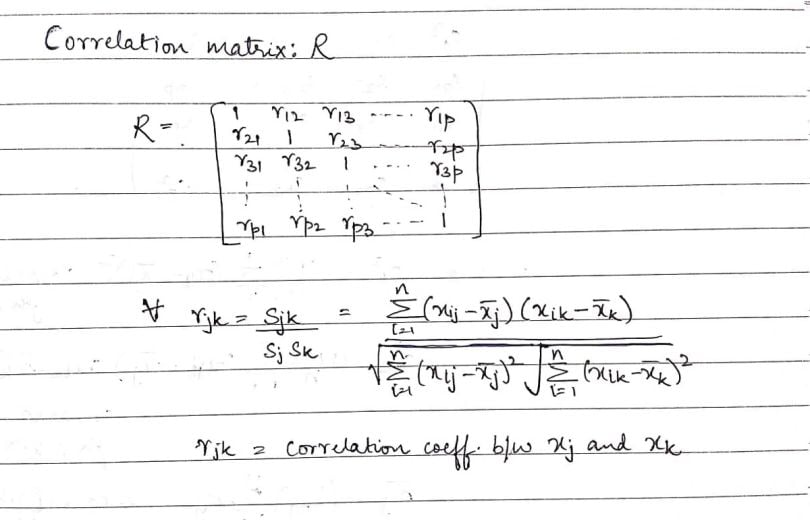

In [370]:
Corr_Denominador = [[0 for y in range(len(stddev))] for matrix in range (len(stddev))]
for i in range(len(stddev)):
  for j in range(len(stddev)):
    Corr_Denominador[i][j]=stddev[i]*stddev[j]

In [371]:
print(Corr_Denominador)

[[0.2237961882669057, 0.22881772409081655, 0.04554382382733062, 81.83171696517948, 0.27375299586387136], [0.22881772409081655, 0.23395193306714385, 0.04656573552599668, 83.66785591577994, 0.27989546185616027], [0.04554382382733062, 0.04656573552599668, 0.009268432607713274, 16.653229573799862, 0.055710324256991905], [81.83171696517948, 83.66785591577994, 16.653229573799862, 29922.001591389435, 100.09856668865777], [0.27375299586387136, 0.27989546185616027, 0.055710324256991905, 100.09856668865777, 0.33486139028904444]]


In [372]:
Corr = [[0 for y in range(len(Corr_Denominador))] for matrix in range (len(Corr_Denominador))]
for i in range(len(Corr_Denominador)):
  for j in range(len(Corr_Denominador)):
    Corr[i][j]=matrix_cov[i][j]/Corr_Denominador[i][j]

In [373]:
print(Corr)

[[1.0, -0.5509223346230154, 0.07232724814516688, -0.01492481067601749, -0.03137607642433949], [-0.5509223346230154, 1.0, 0.2170750509109326, 0.052650925798108185, -0.2481416961761977], [0.07232724814516688, 0.2170750509109326, 1.0, 0.14041564278004676, 0.01453068258402201], [-0.01492481067601749, 0.052650925798108185, 0.14041564278004676, 1.0, 0.017432913628781632], [-0.03137607642433949, -0.2481416961761977, 0.01453068258402201, 0.017432913628781632, 0.9999999999999999]]


In [374]:
matrixcorr_df = pd.DataFrame(Corr)
matrixcorr_df

,0,1,2,3,4
0,1.000000,-0.550922,0.072327,-0.014925,-0.031376
1,-0.550922,1.000000,0.217075,0.052651,-0.248142
2,0.072327,0.217075,1.000000,0.140416,0.014531
3,-0.014925,0.052651,0.140416,1.000000,0.017433
4,-0.031376,-0.248142,0.014531,0.017433,1.000000


In [375]:
matrix.corr()

,medium,big,ROA,profitmargin,booktomarket
medium,1.000000,-0.550922,0.072327,-0.014925,-0.031376
big,-0.550922,1.000000,0.217075,0.052651,-0.248142
ROA,0.072327,0.217075,1.000000,0.140416,0.014531
profitmargin,-0.014925,0.052651,0.140416,1.000000,0.017433
booktomarket,-0.031376,-0.248142,0.014531,0.017433,1.000000


## Matriz de Correlaciones

  ### *Comprobando las matrices generadas con y sin framework, notamos que son identicas, por lo cual las matrices fueron generadas correctamente.*

  ### *Por otro lado, interpretando los valores, se comprueba que aquellos con mayor correlacion positiva son las empresas o firmas grandes de acuerdo al ROA.*

  ### *En cuanto a correlaciones negativas vemos que, las correlaciones entre las empresas medianas y las grandes tienden a ser negativas, de igual manera le sigue la correlacion negativa entre booktomarket y las empresas grandes.* 

## Multicolinearidad

In [376]:
vif_data = pd.DataFrame()
df_vif  = matrix[['medium','big','ROA','profitmargin','booktomarket']]
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

        feature       VIF
0        medium  1.142047
1           big  1.071799
2           ROA  1.039595
3  profitmargin  1.025332
4  booktomarket  1.212110


In [382]:
matrix

,medium,big,ROA,profitmargin,booktomarket
firm,,,,,
SNES,0,0,-0.250645,-11.964103,0.889179
UUU,0,0,-0.020470,-0.029356,0.471873
JAN,0,0,-0.077835,-0.117117,-0.761072
NVFY,0,0,-0.031552,-0.235945,2.258411
SSY,0,0,-0.034716,-0.101073,2.089715
...,...,...,...,...,...
TSLA,0,1,0.048820,0.192099,0.031379
AMZN,0,1,0.011508,0.031509,0.080782
GOOGL,0,1,0.049275,0.295452,0.138166


### *Dado que se puede considerar el punto medio entre 1 y 10 para valores de multicolinearidad, a partir del valor 4, se considera que tiende a tal comportamiento, a pesar de ello, ninguna de las variable sobrepasa el valor. Dicho esto, se comprueba que no se tienen problemas de multicolinearidad entre ellas.*

## Algoritmo con algebra matricial

In [384]:
matrixF = matrix.to_numpy()

In [385]:
matrixF = matrixF.transpose()

In [409]:
import numpy as np

def coef(X, Y):
    X = np.insert(X, 0, np.array((np.ones(len(X[0])))), 0).T
    return np.linalg.inv(X.T @ X) @ X.T @ Y
    
beta = coef(matrixF, y)

for i in range (len(beta)):
    print("beta" + str(i) + ": "+str(beta[i]))

print(coef)

beta0: 0.025283442746122733
beta1: -0.043218100252886575
beta2: 0.002354279842857681
beta3: 1.9447560372630632
beta4: 0.0003785323093560177
beta5: 0.001515102372246063
<function coef at 0x7f5de5c45a70>


In [418]:
mat = matrix[['medium','big','ROA','profitmargin','booktomarket']].to_numpy()

In [419]:
intercept = beta[0]
beta = np.array(beta)

forecast=[]
for i in range(len(x_new)):
    pred = beta[0]*mat[i][0] + beta[1]*mat[i][1] + beta[2]*mat[i][2] + beta[3]*mat[i][3] + beta[4]*mat[i][4] + intercept
    forecast.append(float(pred))


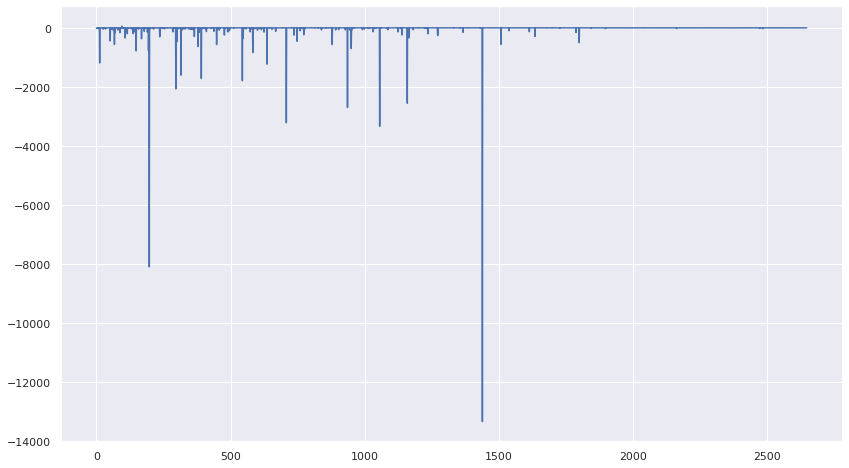

In [420]:
plt.plot(forecast)

In [421]:
error = y.values - forecast

In [422]:
print("error promedio: " + str(error.mean()))

error promedio: 23.537798054781778


In [423]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = sm.add_constant(matrix)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Adj   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     15.09
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.22e-14
Time:                        17:37:20   Log-Likelihood:                -4295.4
No. Observations:                2649   AIC:                             8603.
Df Residuals:                    2643   BIC:                             8638.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0253      0.058      0.436   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
